In [1]:
# import all dependancies
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# upload csv files and read into pandas dataframe
tex_file_path = "../Resources/tex_comp_data.csv"
cal_file_path = "../Resources/cal_comp_data.csv"
tex_file_df = pd.read_csv(tex_file_path)
cal_file_df = pd.read_csv(cal_file_path)
tex_file_df.head()
cal_file_df.tail(10)

,State,Year,Deaths,Population,Crude Rate,Total Background Laws,Total Guns Laws,Deaths Percent
9,California,2008,3084,36604337,8.4,11.0,93.0,0.008
10,California,2009,3010,36961229,8.1,11.0,93.0,0.008
11,California,2010,2858,37253956,7.7,11.0,93.0,0.008
12,California,2011,2904,37691912,7.7,11.0,94.0,0.008
13,California,2012,2941,38041430,7.7,11.0,95.0,0.008
14,California,2013,2918,38332521,7.6,11.0,99.0,0.008
15,California,2014,2838,38802500,7.3,11.0,100.0,0.007
16,California,2015,2984,39144818,7.6,11.0,102.0,0.008
17,California,2016,3098,39250017,7.9,11.0,104.0,0.008
18,California,2017,3083,39536653,7.8,11.0,106.0,0.008


In [2]:
tex_file_df.tail(10)

,State,Year,Deaths,Population,Crude Rate,Total Background Laws,Total Guns Laws,Deaths Percent
9,Texas,2008,2558,24309039,10.5,0.0,19.0,0.011
10,Texas,2009,2641,24801761,10.6,0.0,20.0,0.011
11,Texas,2010,2669,25145561,10.6,0.0,20.0,0.011
12,Texas,2011,2553,25674681,9.9,0.0,20.0,0.010
13,Texas,2012,2683,26059203,10.3,0.0,20.0,0.010
14,Texas,2013,2730,26448193,10.3,0.0,20.0,0.010
15,Texas,2014,2794,26956958,10.4,0.0,20.0,0.010
16,Texas,2015,3147,27469114,11.5,0.0,20.0,0.011
17,Texas,2016,3285,27862596,11.8,0.0,18.0,0.012
18,Texas,2017,3444,28304596,12.2,0.0,18.0,0.012


In [3]:
# T-test for California. Total Background Laws vs Death Percent.
st.ttest_ind(cal_file_df['Total Background Laws'], cal_file_df['Deaths Percent'], equal_var=False)

Ttest_indResult(statistic=62034.12977404877, pvalue=1.9878108863098753e-76)

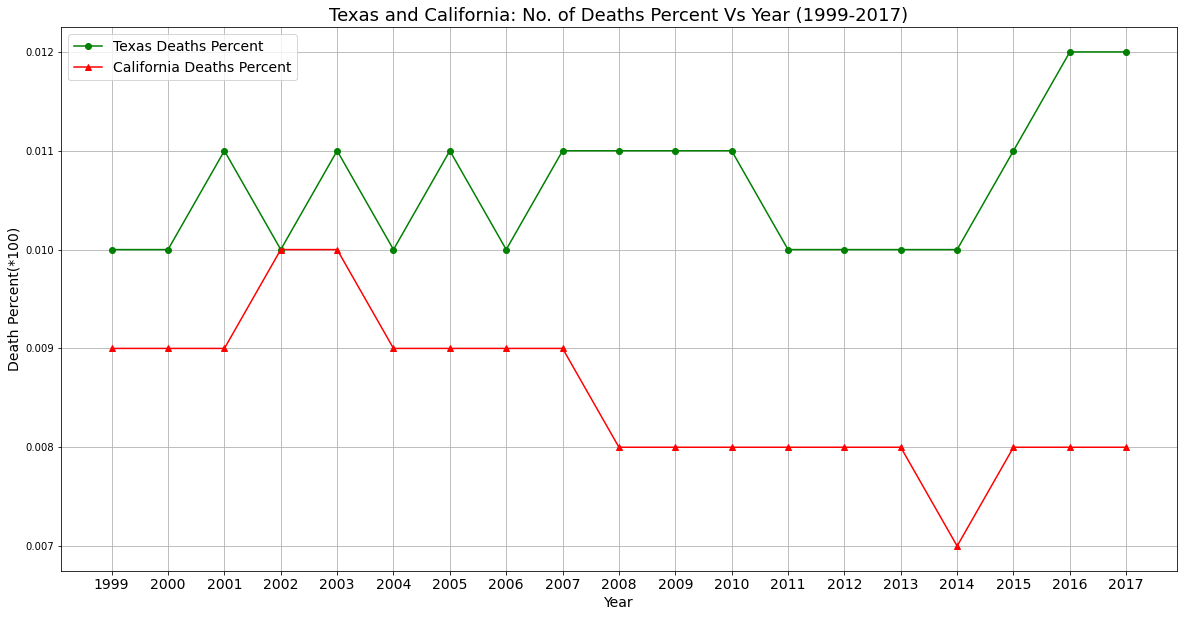

In [5]:
# Plot California and Texas death rates vs year
plt.figure(figsize = (20, 10))
plt.plot(tex_file_df['Year'], tex_file_df['Deaths Percent'], marker = 'o', color = "green", label = 'Texas Deaths Percent')
plt.plot(cal_file_df['Year'], cal_file_df['Deaths Percent'], marker = '^', color = "red", label = 'California Deaths Percent')
plt.title('Texas and California: No. of Deaths Percent Vs Year (1999-2017)', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Death Percent(*100)', fontsize = 14)
plt.xticks(np.arange(1999, 2018, step = 1), fontsize = 14)
# plt.yticks(np.arange(7, 13, step = 0.25), fontsize = 14)
plt.legend(loc = 'best', fontsize = 14)
plt.grid()

# save figure
plt.savefig('../images/Ca-vsTx/cal_tex_death_percent.png')
plt.show()

In [42]:
# T-test for California. Total Guns Laws vs Death Percent.
st.ttest_ind(cal_file_df['Total Guns Laws'], cal_file_df['Deaths Percent'], equal_var=False)

Ttest_indResult(statistic=53.42126153130487, pvalue=2.7766780951025074e-21)

R squared is: 0.22447531974008178
y = -0.0x + 0.01


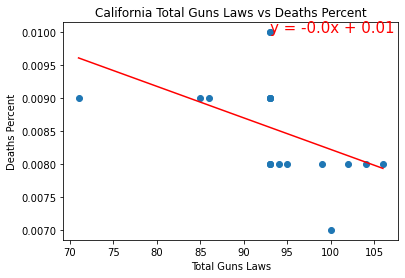

In [6]:
# line regression for California gun laws vs gun related-death percent
x_axis = cal_file_df['Total Guns Laws']
y_axis = cal_file_df['Deaths Percent']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Total Guns Laws')
plt.ylabel('Deaths Percent')
plt.annotate(line_eq,(93, 0.010),fontsize=15,color="r")
plt.title('California Total Guns Laws vs Deaths Percent')
print(f"R squared is: {rvalue**2}")
print(line_eq)

# save figure
plt.savefig('../images/California/cal_gun_death_percent.png')
plt.show()

In [53]:
# T-test for Texas. Total Guns Laws vs Death Percent.
st.ttest_ind(tex_file_df['Total Guns Laws'], tex_file_df['Deaths Percent'], equal_var=False)

Ttest_indResult(statistic=50.9630730042901, pvalue=6.448738792320535e-21)

R squared is: 0.0023879716981132226
y = 0.0x + 0.01


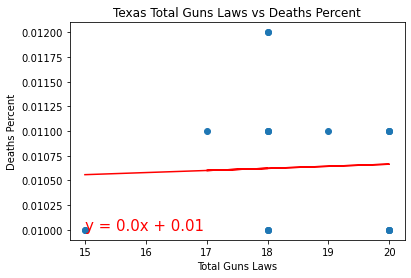

In [7]:
# line regression for Texas gun laws vs gun related-death percent
x_axis = tex_file_df['Total Guns Laws']
y_axis = tex_file_df['Deaths Percent']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Total Guns Laws')
plt.ylabel('Deaths Percent')
plt.annotate(line_eq,(15, 0.010),fontsize=15,color="r")
plt.title('Texas Total Guns Laws vs Deaths Percent')
print(f"R squared is: {rvalue**2}")
print(line_eq)

# save figure
plt.savefig('../images/Texas/tex_gun_death_percent.png')
plt.show()

R squared is: 0.0025091083561299193
y = -1.1x + 3184.75


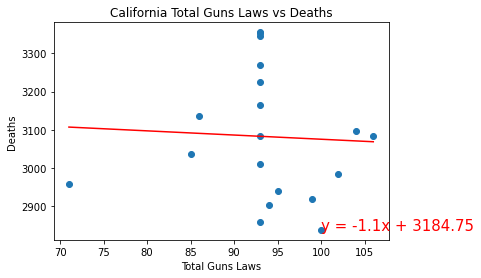

In [8]:
# line regression for California gun laws vs gun related-death
x_axis = cal_file_df['Total Guns Laws']
y_axis = cal_file_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Total Guns Laws')
plt.ylabel('Deaths')
plt.annotate(line_eq,(100, 2838),fontsize=15,color="r")
plt.title('California Total Guns Laws vs Deaths')
print(f"R squared is: {rvalue**2}")
print(line_eq)

# save figure
plt.savefig('../images/California/cal_gun_deaths.png')
plt.show()

R squared is: 0.23361183024776647
y = 113.2x + 510.98


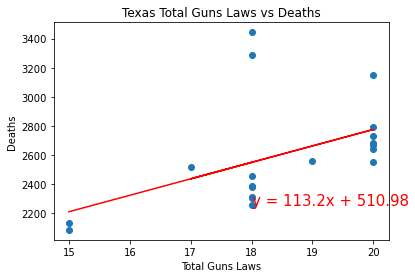

In [9]:
# line regression for California gun laws vs gun related-death
x_axis = tex_file_df['Total Guns Laws']
y_axis = tex_file_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Total Guns Laws')
plt.ylabel('Deaths')
plt.annotate(line_eq,(18, 2257),fontsize=15,color="r")
plt.title('Texas Total Guns Laws vs Deaths')
print(f"R squared is: {rvalue**2}")
print(line_eq)

# save figure
plt.savefig('../images/Texas/tex_gun_deaths.png')
plt.show()

In [41]:
# T-test for California. Total Background Laws vs Death Percent.
st.ttest_ind(cal_file_df['Total Background Laws'], cal_file_df['Deaths Percent'], equal_var=False)

Ttest_indResult(statistic=62034.12977404877, pvalue=1.9878108863098753e-76)

In [9]:
# T-test for Texas. Total Background Laws vs Death Percent.
st.ttest_ind(tex_file_df['Total Background Laws'], tex_file_df['Deaths Percent'], equal_var=False)

Ttest_indResult(statistic=-67.75285971824363, pvalue=3.930957589041589e-23)

In [51]:
# Chisquare test for Texas. Total Guns Laws vs Death Percent.
st.chisquare(tex_file_df['Total Guns Laws'], tex_file_df['Deaths Percent'])

Power_divergenceResult(statistic=612045.6565454545, pvalue=0.0)

In [52]:
# Chisquare test for California. Total Guns Laws vs Death Percent.
st.chisquare(cal_file_df['Total Guns Laws'], cal_file_df['Deaths Percent'])

Power_divergenceResult(statistic=19941605.2572381, pvalue=0.0)